# Session 3 - Perceptron Tutorial

In this tutorial we will train a binary perceptron classifier for hand digit recognition.
<br>
<br>
We will cover:
- Loading and slicing MNIST dataset
- Training and testing perceptron classifier
- Visualize our data and model

## Loading the data
Let's start with loading MNIST data set.

In [82]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

We Imported the tensorflow library and the mnist data set, where the data is already divided to __train and test__

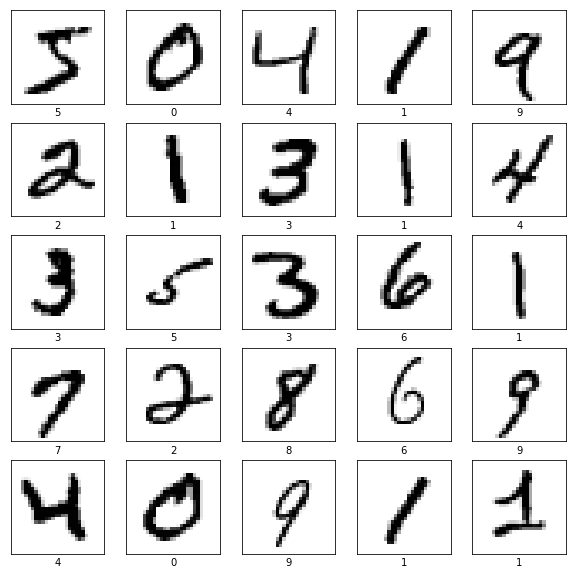

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

We can see that the data is alreadt shuffled.<br><br>
__However__, if the data isn't shuffled we need to make sure that the images are different in every training batch!

In [32]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train, random_state=1)
x_test, y_test = shuffle(x_test, y_test, random_state=1)

After the suffle we will recieve the following images:

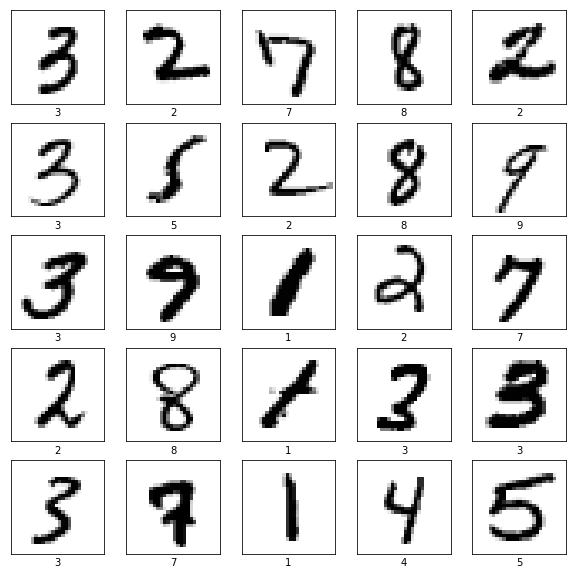

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

Now we would like to flatten each image to a vector:

In [83]:
(normal_x_train, normal_x_test) = ([img.flatten()/255. for img in x_train],
                     [img.flatten()/255. for img in x_test])


## Perceptron Algorithm

Our perceptron will handle 2 classes (+1 or -1) so without loss of generality we will define:
- 1 => +1
- 8 => -1

In [84]:
x = [ex for ex, ey in zip(normal_x_train, y_train) if ey == 1 or ey == 8]
# convert 1 to +1 and 8 to -1
y = [1 if ey == 1 else -1 for ex, ey in zip(normal_x_train, y_train) if ey == 1 or ey == 8]

<img src="imgs/3_1.png">
<img src="imgs/3_2.png">

Lets code it!

In [85]:
import numpy as np
import random

# weight vector
numOfImgs = len(x)      #The number of images in training
dimensions = len(x[0])  #Size of each image
eta = 0.1                     # Learning rate
w = np.zeros((dimensions,));           # The initial weights numpy

T = 8000                      # Amount of epochs/iterations

# Select an random image each epoch
for t in range(0, T):
    # choose example
    i = random.randint(0, numOfImgs-1)
    # predict
    y_hat = np.sign(np.dot(w, x[i]))

    # If the prediction and the real Y are different
    if y_hat * y[i] <= 0:
        w = w + eta * y[i] * x[i]

w_perceptron = w          # The model ready to be tested

### Lets Visualize it

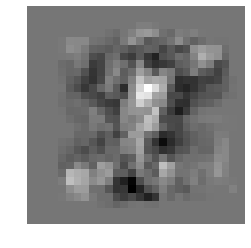

In [86]:
# show the mask learnt by Perceptron
plt.figure(2)
ax1 = plt.subplot(1,1,1)
ax1.axis('off') # no need for axis marks
ax1.imshow(w_perceptron.reshape(28,28),cmap="gray")
plt.show()

Let's see the accuracy of the model on the training data

In [87]:
# testing
M_perceptron = 0
for t in range(0, numOfImgs):
    y_hat = np.sign(np.dot(w_perceptron, x[t]))
    if y[t] != y_hat:
        M_perceptron = M_perceptron + 1
print ("perceptron err = %f" % (float(M_perceptron) / m))

perceptron err = 0.167852


### What were the hyper-parameters?

- eta - learning rate
- T - amount of epochs/iterations
- Initialization method
How does each hyper-parameter affect the optimization process?

We will discuss this in depth when optimizing neural networks.

## Testing
Let's see the accuracy on the test set

In [88]:
# check performence on test data
x = [ex for ex, ey in zip(normal_x_test, y_test) if ey == 1 or ey == 8]
# convert 1 to +1 and 8 to -1
y = [1 if ey == 1 else -1 for ex, ey in zip(normal_x_test, y_test) if ey == 1 or ey == 8]

m =len(x)

M_perceptron = 0
for t in range(0, m):
    y_hat = np.sign(np.dot(w_perceptron, x[t]))
    if y[t] != y_hat:
        M_perceptron = M_perceptron + 1
print ("perceptron err = %f" %( float(M_perceptron) / m))

perceptron err = 0.022760


# Discussion

- Why is important to test?
    - why accuracy on train isn't enough?
    - what about a validation set?
- Why is important to normalize?
    - convergence rate (some weights will update faster than others, draw 2d example)
    - contribution to loss (euclidean distance example in 2d)
    - many components in neural nets assume normalized values (e.g. sigmoid)